# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 603


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?lat={lats}&lon={lngs}&appid={weather_api_key}&units=metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | blackmans bay
Processing Record 2 of Set 1 | port-aux-francais
Processing Record 3 of Set 1 | hamilton
Processing Record 4 of Set 1 | grytviken
Processing Record 5 of Set 1 | basse-terre
Processing Record 6 of Set 1 | nar'yan-mar
Processing Record 7 of Set 1 | bethel
Processing Record 8 of Set 1 | waitangi
Processing Record 9 of Set 1 | nyala
Processing Record 10 of Set 1 | punta arenas
Processing Record 11 of Set 1 | guerrero negro
Processing Record 12 of Set 1 | puerto natales
Processing Record 13 of Set 1 | las vegas
Processing Record 14 of Set 1 | ushuaia
Processing Record 15 of Set 1 | salahonda
Processing Record 16 of Set 1 | adamstown
Processing Record 17 of Set 1 | lihue
Processing Record 18 of Set 1 | puerto ayora
Processing Record 19 of Set 1 | uglegorsk
Processing Record 20 of Set 1 | champerico
Processing Record 21 of Set 1 | arboga
Processing Record 22 of Set 1 | kailua-kona
Processi

Processing Record 41 of Set 4 | mount gambier
Processing Record 42 of Set 4 | arno
Processing Record 43 of Set 4 | walvis bay
Processing Record 44 of Set 4 | colchani
Processing Record 45 of Set 4 | namibe
Processing Record 46 of Set 4 | okhotsk
Processing Record 47 of Set 4 | tomatlan
Processing Record 48 of Set 4 | mount pearl
Processing Record 49 of Set 4 | dubrovnik
Processing Record 0 of Set 5 | kertosono
Processing Record 1 of Set 5 | puerto san carlos
City not found. Skipping...
Processing Record 2 of Set 5 | hood river
Processing Record 3 of Set 5 | broome
Processing Record 4 of Set 5 | beberibe
Processing Record 5 of Set 5 | grand baie
Processing Record 6 of Set 5 | ahau
City not found. Skipping...
Processing Record 7 of Set 5 | chibougamau
Processing Record 8 of Set 5 | kulia village
City not found. Skipping...
Processing Record 9 of Set 5 | hermanus
Processing Record 10 of Set 5 | san jose village
City not found. Skipping...
Processing Record 11 of Set 5 | tura
Processing Re

Processing Record 35 of Set 8 | broken hill
Processing Record 36 of Set 8 | berdigestyakh
Processing Record 37 of Set 8 | mumbwa
Processing Record 38 of Set 8 | tanrake village
City not found. Skipping...
Processing Record 39 of Set 8 | aykhal
Processing Record 40 of Set 8 | loei
Processing Record 41 of Set 8 | sao joao da ponte
Processing Record 42 of Set 8 | uzhur
Processing Record 43 of Set 8 | san luis de la loma
Processing Record 44 of Set 8 | vyaz'ma
Processing Record 45 of Set 8 | alavus
Processing Record 46 of Set 8 | selfoss
Processing Record 47 of Set 8 | imbituba
Processing Record 48 of Set 8 | dossor
Processing Record 49 of Set 8 | qarazhal
Processing Record 0 of Set 9 | macon
Processing Record 1 of Set 9 | kashgar
Processing Record 2 of Set 9 | nizhniy odes
Processing Record 3 of Set 9 | streator
Processing Record 4 of Set 9 | hayma'
City not found. Skipping...
Processing Record 5 of Set 9 | la ronge
Processing Record 6 of Set 9 | melfort
Processing Record 7 of Set 9 | sev

Processing Record 20 of Set 12 | ribeira brava
Processing Record 21 of Set 12 | kibungo
Processing Record 22 of Set 12 | tefe
Processing Record 23 of Set 12 | port hedland
Processing Record 24 of Set 12 | new plymouth
Processing Record 25 of Set 12 | yuzhno-kurilsk
Processing Record 26 of Set 12 | gordonvale
Processing Record 27 of Set 12 | prince george
Processing Record 28 of Set 12 | keflavik
Processing Record 29 of Set 12 | kudahuvadhoo
Processing Record 30 of Set 12 | piton saint-leu
Processing Record 31 of Set 12 | caleta olivia
Processing Record 32 of Set 12 | sovetskiy
Processing Record 33 of Set 12 | jodiya bandar
Processing Record 34 of Set 12 | whangarei
Processing Record 35 of Set 12 | sur
Processing Record 36 of Set 12 | singkil
Processing Record 37 of Set 12 | altamira
Processing Record 38 of Set 12 | brisas de zicatela
Processing Record 39 of Set 12 | labytnangi
Processing Record 40 of Set 12 | marsa alam
Processing Record 41 of Set 12 | yaren
Processing Record 42 of Set

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          574
Lat           574
Lng           574
Max Temp      574
Humidity      574
Cloudiness    574
Wind Speed    574
Country       574
Date          574
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,blackmans bay,-43.0167,147.3167,10.07,67,22,0.89,AU,1698703150
1,port-aux-francais,-49.3500,70.2167,2.80,92,99,17.75,TF,1698703404
2,hamilton,39.1834,-84.5333,8.19,82,100,5.14,US,1698703160
3,grytviken,-54.2811,-36.5092,4.36,83,6,2.91,GS,1698703161
4,basse-terre,16.1667,-61.6667,26.58,78,20,3.60,GP,1698703210


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,blackmans bay,-43.0167,147.3167,10.07,67,22,0.89,AU,1698703150
1,port-aux-francais,-49.3500,70.2167,2.80,92,99,17.75,TF,1698703404
2,hamilton,39.1834,-84.5333,8.19,82,100,5.14,US,1698703160
3,grytviken,-54.2811,-36.5092,4.36,83,6,2.91,GS,1698703161
4,basse-terre,16.1667,-61.6667,26.58,78,20,3.60,GP,1698703210


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

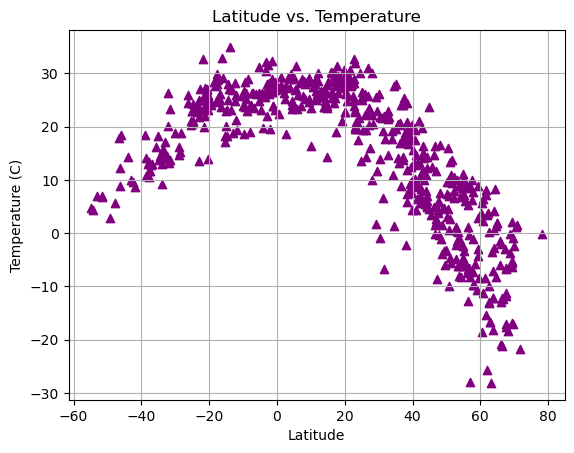

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], color= 'purple', marker = '^')

# Incorporate the other graph properties
plt.title("Latitude vs. Temperature")
plt.ylabel("Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("..\output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

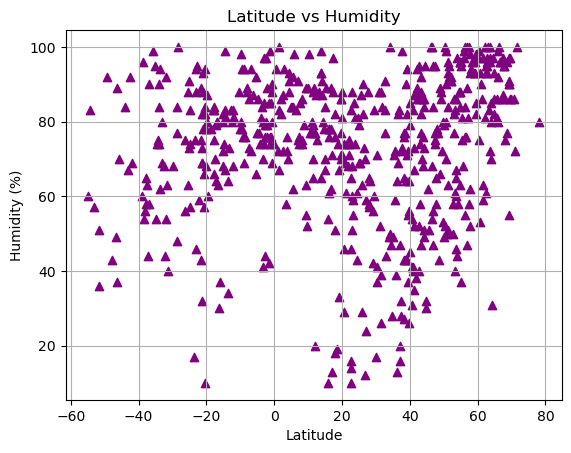

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], color='purple', marker = '^') 

# Incorporate the other graph properties
plt.title("Latitude vs Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

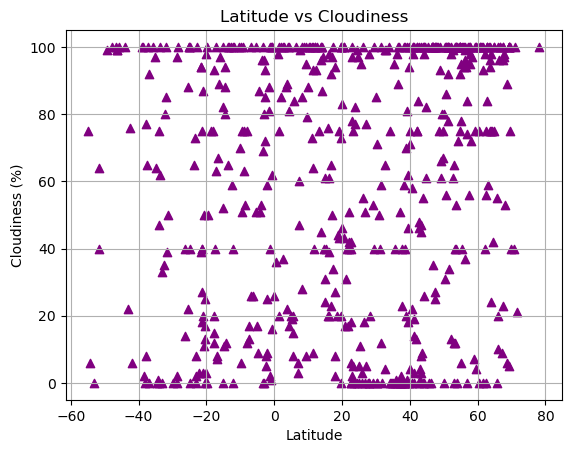

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], color='purple', marker = '^')

# Incorporate the other graph properties
plt.title("Latitude vs Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

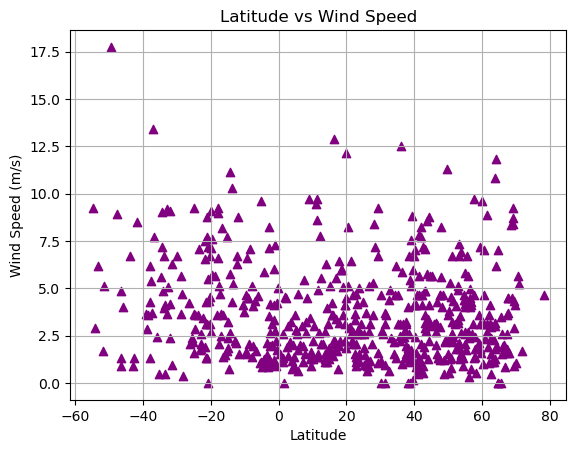

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], color='purple', marker = '^')

# Incorporate the other graph properties
plt.title("Latitude vs Wind Speed")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


The r-value is -0.629452833300739


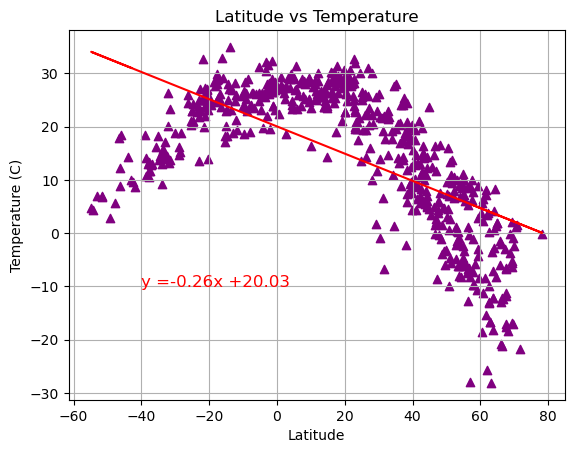

In [12]:
# Define a function to create Linear Regression plots
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y =' + str(round(slope,2)) + 'x +' + str(round(intercept,2))
plt.scatter(x_values,y_values, marker = '^', color='purple')
plt.plot(x_values,regress_values,'r-')
plt.grid(True)
print(f'The r-value is {rvalue}')
plt.title('Latitude vs Temperature')
plt.annotate(line_eq,(-40,-10), fontsize=12, color='r')
plt.xlabel('Latitude')
plt.ylabel('Temperature (C)')
plt.show()


The r-value is 0.09865693874898507


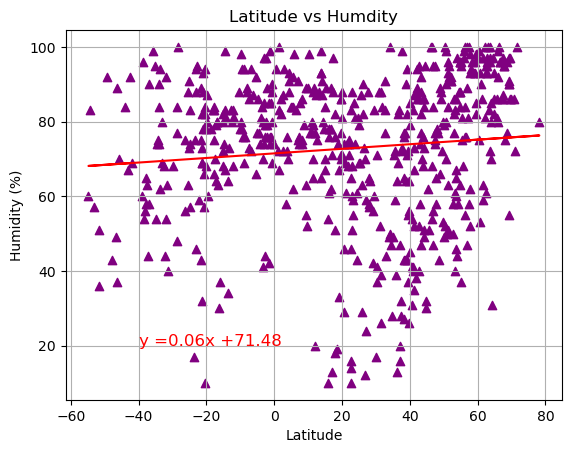

In [13]:
# Define a function to create Linear Regression plots
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y =' + str(round(slope,2)) + 'x +' + str(round(intercept,2))
plt.scatter(x_values,y_values, marker = '^', color='purple')
plt.plot(x_values,regress_values,'r-')
plt.grid(True)
print(f'The r-value is {rvalue}')
plt.title('Latitude vs Humdity')
plt.annotate(line_eq,(-40, 20), fontsize=12, color='r')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.show()

The r-value is 0.13325118096822222


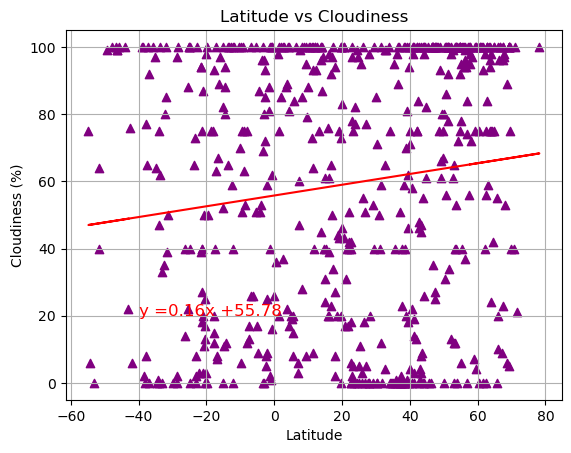

In [14]:
# Define a function to create Linear Regression plots
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y =' + str(round(slope,2)) + 'x +' + str(round(intercept,2))
plt.scatter(x_values,y_values, marker = '^', color='purple')
plt.plot(x_values,regress_values,'r-')
plt.grid(True)
print(f'The r-value is {rvalue}')
plt.title('Latitude vs Cloudiness')
plt.annotate(line_eq,(-40, 20), fontsize=12, color='r')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.show()

The r-value is -0.13736273362786736


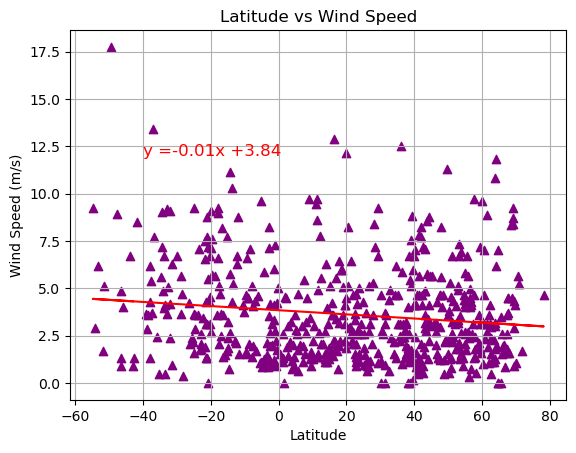

In [15]:
# Define a function to create Linear Regression plots
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y =' + str(round(slope,2)) + 'x +' + str(round(intercept,2))
plt.scatter(x_values,y_values, marker = '^', color='purple')
plt.plot(x_values,regress_values,'r-')
plt.grid(True)
print(f'The r-value is {rvalue}')
plt.title('Latitude vs Wind Speed')
plt.annotate(line_eq,(-40, 12), fontsize=12, color='r')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.show()

In [16]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,hamilton,39.1834,-84.5333,8.19,82,100,5.14,US,1698703160
4,basse-terre,16.1667,-61.6667,26.58,78,20,3.60,GP,1698703210
5,nar'yan-mar,67.6713,53.0870,-6.61,95,97,4.47,RU,1698703406
6,bethel,41.3712,-73.4140,12.93,87,100,1.34,US,1698703379
8,nyala,12.0500,24.8833,28.52,20,100,2.65,SD,1698703409


In [17]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,blackmans bay,-43.0167,147.3167,10.07,67,22,0.89,AU,1698703150
1,port-aux-francais,-49.3500,70.2167,2.80,92,99,17.75,TF,1698703404
3,grytviken,-54.2811,-36.5092,4.36,83,6,2.91,GS,1698703161
7,waitangi,-43.9535,-176.5597,14.34,84,100,6.71,NZ,1698703408
9,punta arenas,-53.1500,-70.9167,7.06,57,0,6.17,CL,1698703170


###  Temperature vs. Latitude Linear Regression Plot

The r-value is -0.8626629518053589


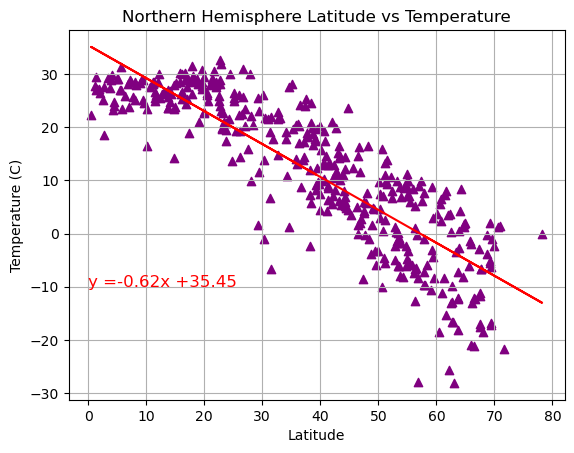

In [18]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y =' + str(round(slope,2)) + 'x +' + str(round(intercept,2))
plt.scatter(x_values,y_values, marker = '^', color='purple')
plt.plot(x_values,regress_values,'r-')
plt.grid(True)
print(f'The r-value is {rvalue}')
plt.title('Northern Hemisphere Latitude vs Temperature')
plt.annotate(line_eq,(0,-10), fontsize=12, color='r')
plt.xlabel('Latitude')
plt.ylabel('Temperature (C)')
plt.show()

The r-value is 0.7993855366905357


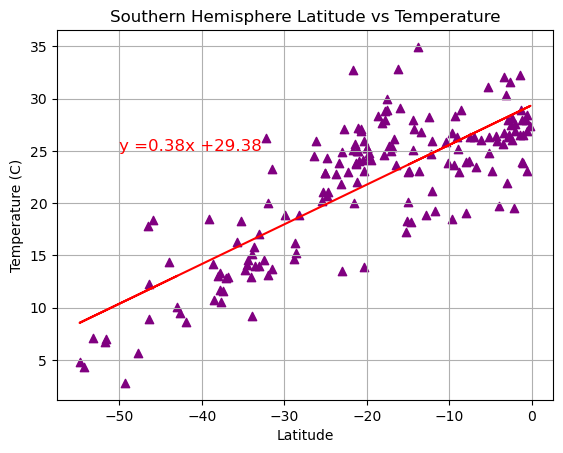

In [19]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y =' + str(round(slope,2)) + 'x +' + str(round(intercept,2))
plt.scatter(x_values,y_values, marker = '^', color='purple')
plt.plot(x_values,regress_values,'r-')
plt.grid(True)
print(f'The r-value is {rvalue}')
plt.title('Southern Hemisphere Latitude vs Temperature')
plt.annotate(line_eq,(-50, 25), fontsize=12, color='r')
plt.xlabel('Latitude')
plt.ylabel('Temperature (C)')
plt.show()

**Discussion about the linear relationship:** In the Northern hemisphere the temperature and latitude have a tighter relationship than the Southern hemisphere.  

### Humidity vs. Latitude Linear Regression Plot

The r-value is 0.1917225690397402


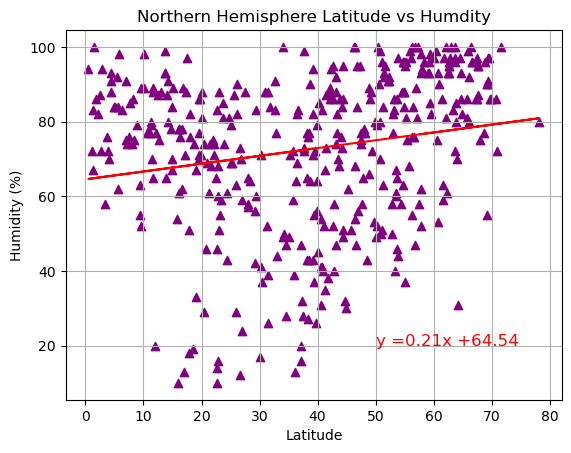

In [20]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y =' + str(round(slope,2)) + 'x +' + str(round(intercept,2))
plt.scatter(x_values,y_values, marker = '^', color='purple')
plt.plot(x_values,regress_values,'r-')
plt.grid(True)
print(f'The r-value is {rvalue}')
plt.title('Northern Hemisphere Latitude vs Humidity')
plt.annotate(line_eq,(50, 20), fontsize=12, color='r')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.show()

The r-value is 0.24810587864692255


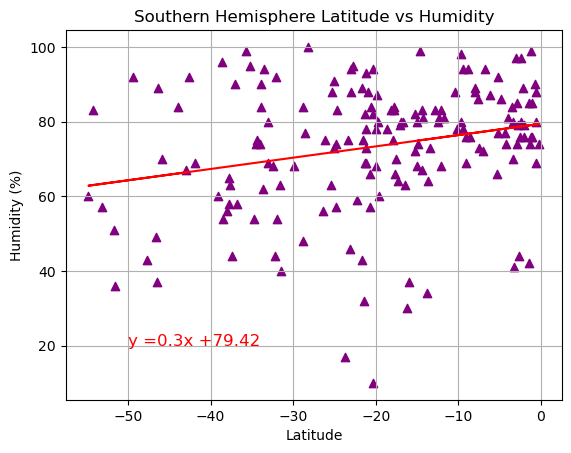

In [21]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y =' + str(round(slope,2)) + 'x +' + str(round(intercept,2))
plt.scatter(x_values,y_values, marker = '^', color='purple')
plt.plot(x_values,regress_values,'r-')
plt.grid(True)
print(f'The r-value is {rvalue}')
plt.title('Southern Hemisphere Latitude vs Humidity')
plt.annotate(line_eq,(-50, 20), fontsize=12, color='r')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.show()

**Discussion about the linear relationship:** The linear relationship in the Northern hemisphere and the Southern hemisphere is similar with the Northern hemisphere r-value at .19 and the Southern hemisphere at .24

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is 0.15091240522667582


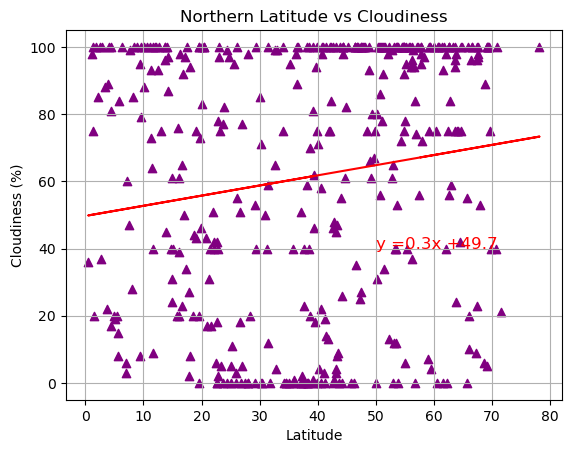

In [22]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y =' + str(round(slope,2)) + 'x +' + str(round(intercept,2))
plt.scatter(x_values,y_values, marker = '^', color='purple')
plt.plot(x_values,regress_values,'r-')
plt.grid(True)
print(f'The r-value is {rvalue}')
plt.title('Northern Latitude vs Cloudiness')
plt.annotate(line_eq,(50, 40), fontsize=12, color='r')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.show()

The r-value is -0.008999615763098281


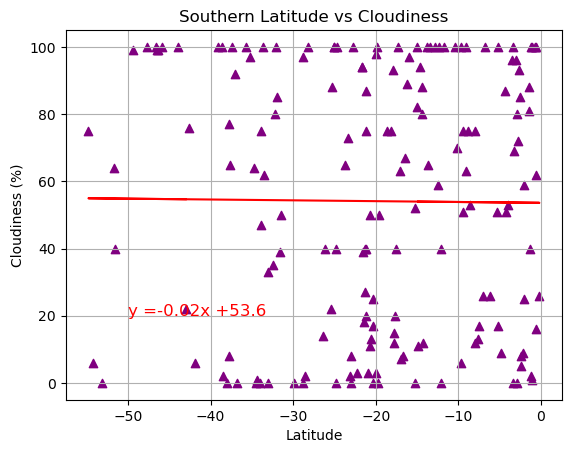

In [23]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y =' + str(round(slope,2)) + 'x +' + str(round(intercept,2))
plt.scatter(x_values,y_values, marker = '^', color='purple')
plt.plot(x_values,regress_values,'r-')
plt.grid(True)
print(f'The r-value is {rvalue}')
plt.title('Southern Latitude vs Cloudiness')
plt.annotate(line_eq,(-50, 20), fontsize=12, color='r')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.show()

**Discussion about the linear relationship:** The Northern hemisphere shows a steady increase as you move further from north from the equator while the Southern hemisphere shows to stay pretty consistant as you get further south of the equator.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is 0.07485945095750501


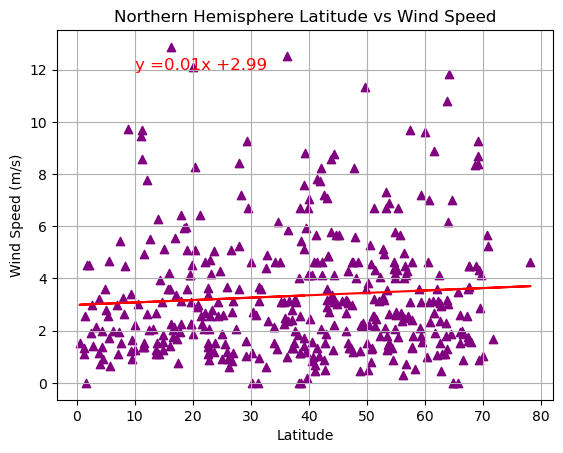

In [24]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y =' + str(round(slope,2)) + 'x +' + str(round(intercept,2))
plt.scatter(x_values,y_values, marker = '^', color='purple')
plt.plot(x_values,regress_values,'r-')
plt.grid(True)
print(f'The r-value is {rvalue}')
plt.title('Northern Hemisphere Latitude vs Wind Speed')
plt.annotate(line_eq,(10, 12), fontsize=12, color='r')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.show()

The r-value is -0.22411092677498046


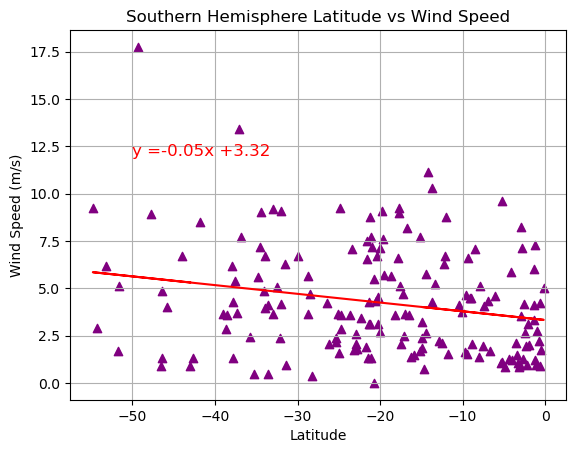

In [25]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y =' + str(round(slope,2)) + 'x +' + str(round(intercept,2))
plt.scatter(x_values,y_values, marker = '^', color='purple')
plt.plot(x_values,regress_values,'r-')
plt.grid(True)
print(f'The r-value is {rvalue}')
plt.title('Southern Hemisphere Latitude vs Wind Speed')
plt.annotate(line_eq,(-50, 12), fontsize=12, color='r')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.show()

**Discussion about the linear relationship:** Wind speed increase slightly the further North and further South you travel indicating it is a more windy climate the further you travel from teh equator North or South.